In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np, pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
reviews = pd.read_csv('/content/drive/My Drive/Datasets/sample30.csv')
reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


EDA

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
reviews.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
reviews.user_sentiment.value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

Let's check the review length of each of the reviews.

In [7]:
reviews['review_len'] = [len(t) for t in reviews.reviews_text]
reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_len
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,201
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,62
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,12
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,696
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,132


Mapping 1 to all the Postive User Sentiments and 0 to all Negative

In [8]:
reviews.user_sentiment = reviews.user_sentiment.map({'Positive' : 1, 'Negative' : 0})

Select all Rows with NaN Values for user_sentiment

In [9]:
reviews[reviews['user_sentiment'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_len
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN,369


Looking at the Review Title

In [10]:
reviews[reviews['user_sentiment'].isna()].reviews_title

28354    a super hit with my children. they loved it!!??
Name: reviews_title, dtype: object

In [11]:
reviews.user_sentiment = reviews.user_sentiment.fillna(1)

In [12]:
reviews[reviews['user_sentiment'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_len


In [13]:
reviews.user_sentiment = reviews.user_sentiment.astype(int)
reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_len
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,1,201
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,1,62
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,1,12
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,0,696
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,0,132


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

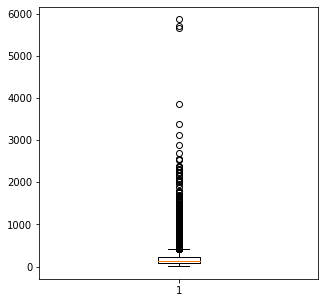

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(reviews.review_len)
plt.show()

Lets Create Word Cloud of Positive and Negative reviews

Positive

In [16]:
pos_reviews = reviews[reviews.user_sentiment == 1] 
pos_string = []
for t in pos_reviews.reviews_text:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

"i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i "

Negative

In [17]:
neg_reviews = reviews[reviews.user_sentiment == 0]
neg_words = []
for t in neg_reviews.reviews_text:
    neg_words.append(t)
neg_words[:5]

["I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",
 "My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.",
 'My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely 

In [18]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'I read through the reviews on here before looking in to buying one of the couples lubricants, and wa'

In [19]:
for t in neg_reviews.reviews_text[:300]:
    if 'good' in t:
        print(t)

As my skin is aging and I'm in the dry state of Colorado, this is my go to moisturizer. I feel it completely moisturizers my face and makes it look fresher and less aged. My face appears smoother and brighter. I also likes the way it is a good base for any make-up regimen I follow it with. This review was collected as part of a promotion.
Windex used to be good years ago. Since they reformulated it, I will no longer buy it. It leaves a terrible film.
Windex used to be good years ago, the last couple of years it is terrible. After cleaning window three times there is still a film everywhere, looks terrible when the sun light shines on it. Will not be buying anymore.
I am 67 years old and windex is what I have always used as did my mother. I was so disappointed with the original windex. It left cloudy windows and did not smell like the original. I thought maybe you had changed the formula. I have since found that other woman have the same issues of cloudy windows. Was there an issue or i

So, we can very well see, even if the texts contain words like "good", it is a negative sentiment because it indicates that the product is NOT a good product.

Word Cloud for Positively classified reviews

In [20]:
from wordcloud import WordCloud

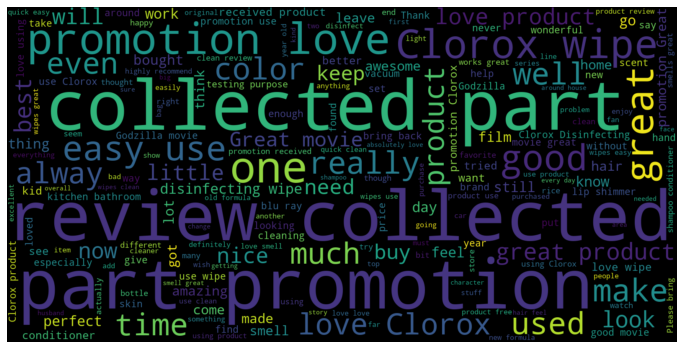

In [21]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for Negatively classified reviews

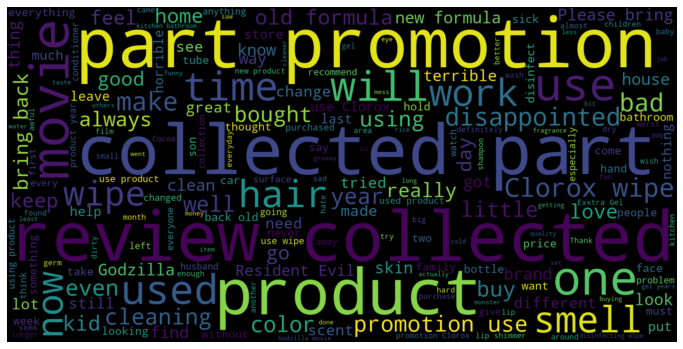

In [22]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Term Frequencies of each Sentiment class

We need the Term Frequency data to see what kind of words are used in the movie reviews and how many times have been used. Let's proceed with CountVectorizer to calculate term frequencies:

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(reviews.reviews_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
len(cvector.get_feature_names())

222449

It looks like count vectorizer has extracted 222449 words out of the corpus. Getting term frequency for each class can be obtained with the below code block.

Term Frequency for 'Positive' sentiments

In [25]:
pos_matrix = cvector.transform(reviews[reviews.user_sentiment == 1].reviews_text)
neg_matrix = cvector.transform(reviews[reviews.user_sentiment == 0].reviews_text)

In [26]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])

In [27]:
pos_tf.head()

,Terms,positive
0,the,38540
1,and,30004
2,this,23467
3,it,23228
4,to,20884


In [28]:
pos_tf_df = pos_tf.set_index('Terms')
pos_tf_df.head()

,positive
Terms,
the,38540
and,30004
this,23467
it,23228
to,20884


In [29]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
the,4581
and,2971
it,2649
this,2553
to,2348


In [30]:
term_freq_df = pd.concat([pos_tf_df, neg_tf_df],axis=1)

In [31]:
term_freq_df['total'] = term_freq_df['positive'] + term_freq_df['negative']
term_freq_df.sort_values(by='total', ascending=False).head(20)

,positive,negative,total
the,38540,4581,43121
and,30004,2971,32975
this,23467,2553,26020
it,23228,2649,25877
to,20884,2348,23232
of,19036,2058,21094
my,15457,1778,17235
was,14232,1629,15861
as,12685,1276,13961
for,12309,1404,13713


Frequency plot of top frequent 500 reviews

Text(0.5, 1.0, 'Top 500 reviews')

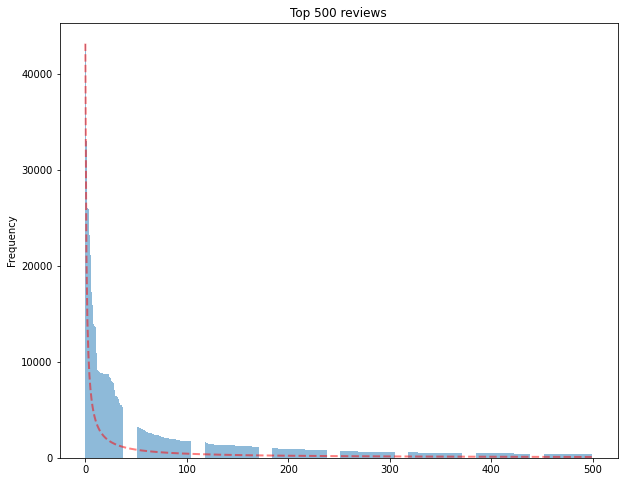

In [32]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 reviews')

On the X-axis is the rank of the frequency from highest rank from left up to 500th rank to the right. Y-axis is the frequency observed in the corpus.

Plot of Absolute frequency of phrases against their rank

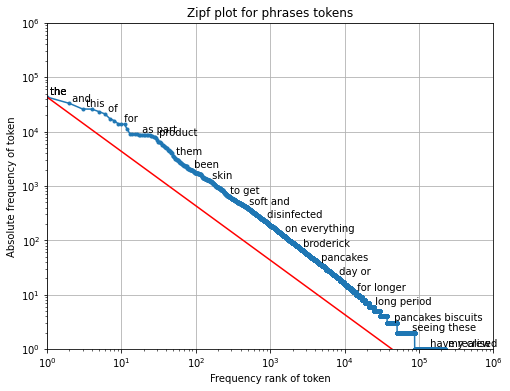

In [33]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

We can clearly see that words like "the", "in","it", etc are much higher in frequency but has been ranked less as they don't have any significance regarding the sentiment of the review. On the other hand, some words like "pancake biscuits" have been given higher rank as they are very less frequent in the document and seems to be significant related to the sentiment.

Reviews Tokens Visualisation

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(reviews.reviews_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [35]:
pos_matrix = cvec.transform(reviews[reviews.user_sentiment == 1].reviews_text)
neg_matrix = cvec.transform(reviews[reviews.user_sentiment == 0].reviews_text)


pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')



neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')


term_freq_df = pd.concat([pos_words_tf_df, neg_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['positive'] + term_freq_df['negative']
        
term_freq_df.sort_values(by='total', ascending=False).head(15)

,positive,negative,total
review,8282,836,9118
great,8853,94,8947
promotion,7945,802,8747
collected,7943,802,8745
love,8216,178,8394
use,7199,813,8012
product,6890,869,7759
movie,5868,460,6328
wipes,4810,429,5239
clean,4859,94,4953


Plot of top frequently used 50 positive reviews

Text(0.5, 1.0, 'Top 50 tokens in positive reviews')

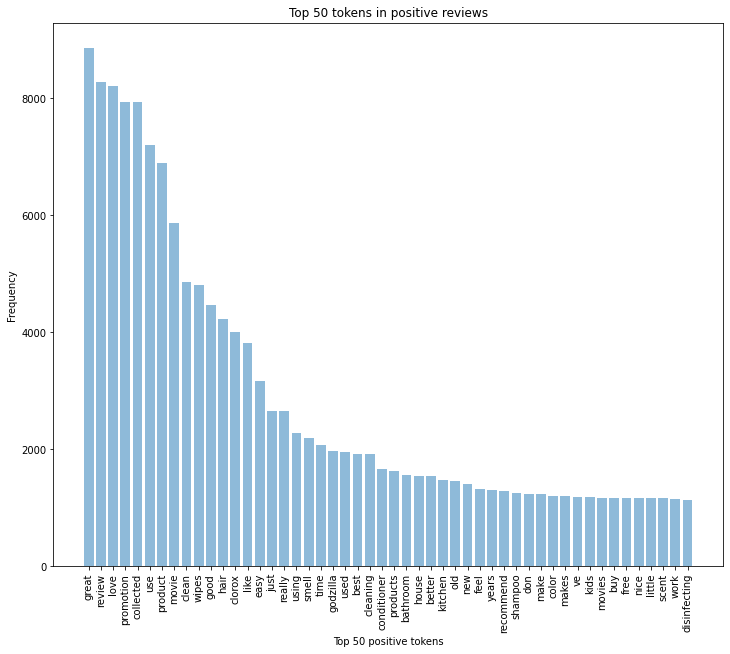

In [36]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive reviews')

Plot of top frequently used 50 negative reviews

Text(0.5, 1.0, 'Top 50 tokens in negative reviews')

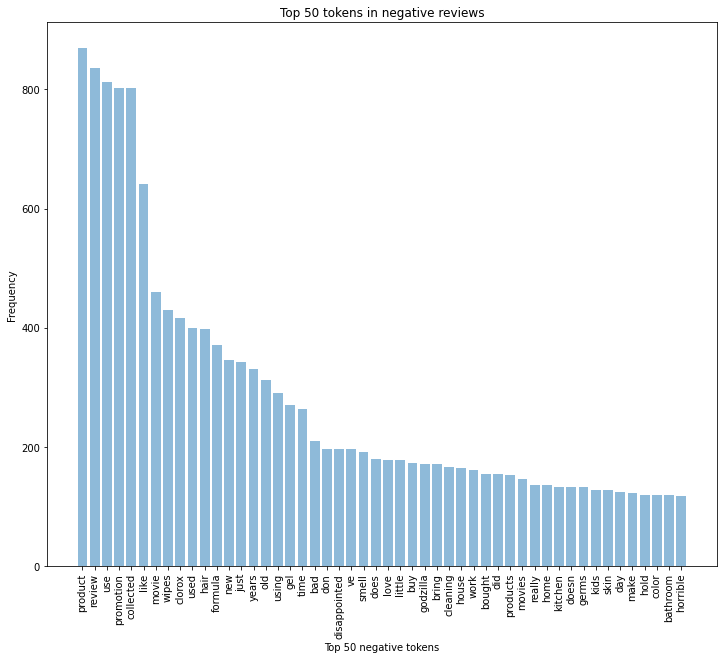

In [37]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative reviews')

Supervised Machine Learning Models

Feature Engineering

In [38]:
reviews_text = np.array(reviews['reviews_text'])
sentiments = np.array(reviews['user_sentiment'])
# build train and test datasets

from sklearn.model_selection import train_test_split    
reviews_text_train, reviews_text_test, sentiments_train, sentiments_test = train_test_split(reviews_text, sentiments, test_size=0.2, random_state=4)

Implementation of CountVectorizer & TF-IDF

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train phrases
cv = CountVectorizer(stop_words='english',max_features=25000)
cv_train_features = cv.fit_transform(reviews_text_train)

In [40]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(reviews_text_train)

In [41]:
# transform test reviews into features
cv_test_features = cv.transform(reviews_text_test)
tv_test_features = tv.transform(reviews_text_test)

In [42]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (24000, 15574)  Test features shape: (6000, 15574)
TFIDF model:> Train features shape: (24000, 192118)  Test features shape: (6000, 192118)


 Model Training, Prediction and Performance Evaluation

In [43]:
####Evaluation metrics


from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)

Logistic Regression model on CountVectorizer

In [45]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_bow_predictions)

Model Performance metrics:
------------------------------
Accuracy: 0.946
Precision: 0.9438
Recall: 0.946
F1 Score: 0.9445

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.96      0.98      0.97      5316
           0       0.80      0.70      0.75       684

    accuracy                           0.95      6000
   macro avg       0.88      0.84      0.86      6000
weighted avg       0.94      0.95      0.94      6000


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1       5195  121
        0        203  481


Logistic Regression model on TF-IDF features

In [46]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=sentiments_train,
                                               test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_tfidf_predictions)

Model Performance metrics:
------------------------------
Accuracy: 0.8947
Precision: 0.902
Recall: 0.8947
F1 Score: 0.8529

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.89      1.00      0.94      5316
           0       0.96      0.08      0.15       684

    accuracy                           0.89      6000
   macro avg       0.93      0.54      0.54      6000
weighted avg       0.90      0.89      0.85      6000


Prediction Confusion Matrix:
------------------------------
          Predicted:    
                   1   0
Actual: 1       5314   2
        0        630  54


RandomForest model on TF-IDF

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [48]:
# RandomForest model on TF-IDF
rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_tfidf_predictions)

Model Performance metrics:
------------------------------
Accuracy: 0.9057
Precision: 0.9083
Recall: 0.9057
F1 Score: 0.8765

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.91      1.00      0.95      5316
           0       0.93      0.19      0.31       684

    accuracy                           0.91      6000
   macro avg       0.92      0.59      0.63      6000
weighted avg       0.91      0.91      0.88      6000


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1       5307    9
        0        557  127


Bernoulli Navie Bayes

In [49]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

In [50]:
bnb_tfidf_predictions = train_predict_model(classifier=bnb, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=bnb_tfidf_predictions)

Model Performance metrics:
------------------------------
Accuracy: 0.8848
Precision: 0.8432
Recall: 0.8848
F1 Score: 0.8448

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.89      0.99      0.94      5316
           0       0.46      0.07      0.12       684

    accuracy                           0.88      6000
   macro avg       0.68      0.53      0.53      6000
weighted avg       0.84      0.88      0.84      6000


Prediction Confusion Matrix:
------------------------------
          Predicted:    
                   1   0
Actual: 1       5263  53
        0        638  46


Multinomial Naive Bayes

In [51]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [52]:
mnb_tfidf_predictions = train_predict_model(classifier=mnb, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=mnb_tfidf_predictions)

Model Performance metrics:
------------------------------
Accuracy: 0.886
Precision: 0.785
Recall: 0.886
F1 Score: 0.8324

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.89      1.00      0.94      5316
           0       0.00      0.00      0.00       684

    accuracy                           0.89      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.78      0.89      0.83      6000


Prediction Confusion Matrix:
------------------------------
          Predicted:   
                   1  0
Actual: 1       5316  0
        0        684  0


In [54]:
data = [['Logistic Regression using BOW', 0.946, 0.9438, 0.946, 0.9445], ['Logistic Regression using TF-IDF', 0.8947, 0.902, 0.8947, 0.8529],
		['Random Forest model using TF-IDF', 0.9053, 0.9079, 0.9053, 0.8758], ['Bernoulli Navie Bayes', 0.8848, 0.8432, 0.8848, 0.8448],
		['Multinomial Naive Bayes', 0.886, 0.785, 0.886, 0.8324]]

In [56]:
sentiments = pd.DataFrame(data, columns = ['Machine Learning Models', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
sentiments

,Machine Learning Models,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression using BOW,0.9460,0.9438,0.9460,0.9445
1,Logistic Regression using TF-IDF,0.8947,0.9020,0.8947,0.8529
2,Random Forest model using TF-IDF,0.9053,0.9079,0.9053,0.8758
3,Bernoulli Navie Bayes,0.8848,0.8432,0.8848,0.8448
4,Multinomial Naive Bayes,0.8860,0.7850,0.8860,0.8324


Clearly you could see the Logistic Regression using Bag Of Words model is outperforming. And for TF-IDF Random Forest Model is giving the highest results.